# Modelo de IA em Classificação Binária

### Bruno Oliveira

## 1.Objetivo

- Definir um problema simples de classificação binária usando uma RNA rasa (RNA de uma camada intermediária).
- Detalhar o método do Gradiente Descendente e o algoritmo de Retro-Propagação para um problema de classificação binária.
- Apresentar a vetorização do cálculo da propagação para frente e da retro-propagação para todos os exemplos.


## 2.Descrição do Problema

- Nesse exemplo queremos determinar se um ponto no plano pertence ou não a uma determinada classe, que é definida pela sua posição no plano.

## 3.Algoritmo

**CARREGAR DADOS DE ENTRADA**
⇒ No código da célula abaixo é importado o conjunto de dados de pontos no plano com padrão "noise_moons" da biblioteca
Sklearn.

A dimensão de X_train é: (800, 2)
A dimensão de Y_train é: (800,)
A dimensão de X_teste é: (200, 2)
A dimensão de Y_teste é: (200,)


<ipython-input-1-e95a774833e2>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


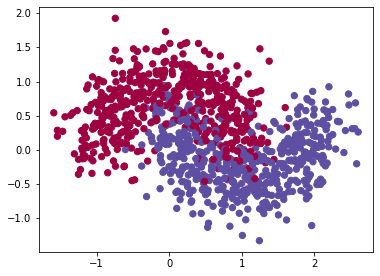

In [1]:
# Importa conjunto de dados da bblioteca Sklearn e bolbioteca Matplotlib
import sklearn.datasets
import matplotlib.pyplot as plt

# Define número de exemplos e chama função para gerar os dados
m = 1000
data = sklearn.datasets.make_moons(n_samples=m, noise=.3)

# Recupera dados de entrada e de saída do conjunto de dados
X, Y = data

# Separa dados em conjunsto de treinamento e teste
X_train = X[:800,:]
Y_train = Y[:800]
X_teste = X[800:,:]
Y_teste = Y[800:]

# Determina dimensão dos dados
shape_X_train = X_train.shape
shape_Y_train = Y_train.shape
shape_X_teste = X_teste.shape
shape_Y_teste = Y_teste.shape
print ('A dimensão de X_train é: ' + str(shape_X_train))
print ('A dimensão de Y_train é: ' + str(shape_Y_train))
print ('A dimensão de X_teste é: ' + str(shape_X_teste))
print ('A dimensão de Y_teste é: ' + str(shape_Y_teste))

# Visualização dos dados
plt.figure(figsize=(6, 4.5))
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
ax = plt.axes()
plt.show()

⇒ Note que são usados 800 exemplos de treinamento e 200 exemplos de teste;


**CONFIGURAÇÃO DA RNA**
⇒ Para resolver esse problema é usada uma RNA sequencial de 3 camadas com a seguinte configuração:
    - Uma camada intermediária com 10 neurônios e função de tivação ReLu;
    - Uma camada intermediária com 4 neurônios e função de tivação ReLu;
    - Uma camada de saída com 1 neurônio e função de ativação sigmoide.

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
rna = models.Sequential()
rna.add(layers.Dense(units=10, activation='relu', input_dim=2))
rna.add(layers.Dense(units=4, activation='relu'))
rna.add(layers.Dense(units=1, activation='sigmoid'))
rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


⇒ Observa-se que essa RNA possui somente 79 parâmetros, o que é relativamente pouco.

**COMPILAÇÃO DA RNA**
⇒ Para compliar essa RNA são utilizados os seguintes parâmetros:
    - Método de otimização: gradiente descendente;
    - Taxa de aprendizado: lr = 0.5 ;
    - Função de custo: função logística (`binary_crossentropy´); Métrica: exatidão ( accuracy )).

In [3]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.5)
rna.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

**TREINAMENTO DA RNA**
⇒ O processo de treinamento da RNA é realizado usando os seguintes parâmetros:
    - número de épocas: epochs=1000 ;
    - verbose=0 para não mostrar nenhuma saída, pois o processo de treinamento é salvo no dicionário historia .

In [4]:
historia = rna.fit(X_train, Y_train, epochs=1000, verbose=0, batch_size=800)

**VISUALIZAÇÃO DO RESULTADO DO TREINAMENTO**
⇒ O objeto historia contém um dicionário com os valores da função de custo e das métricas em função do número de épocas, que podem ser acessadas fazendo-se:

In [5]:
historia_dict = historia.history
historia_dict.keys()

dict_keys(['loss', 'accuracy'])

⇒ O comando historia_dict.keys apresenta o conteúdo do dicionário salvo durante o treinamento, que no caso são: função
de custo ( loss ) e a métrica exatidão ( accuracy ).

⇒ Após recuperar e verificar o conteúdo do objeto history, podemos colocar os valores da função de custo e das métricas em vetores, usando os seguintes comandos:

In [6]:
# Salva custo,métrica e épocas em vetores
custo = historia_dict['loss']
exatidao = historia_dict['accuracy']
# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

⇒ Os gráficos da função de custo e da métrica em função das épocas podem ser realizados usando as funções da bilbioteca Matplotlib da seguinte forma:

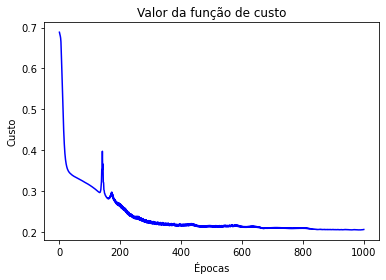

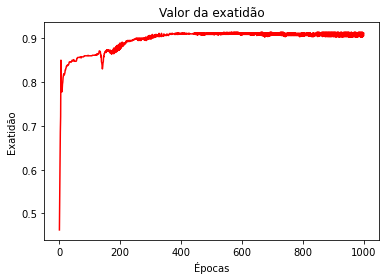

In [7]:
# Gráfico do custo
plt.plot(epocas, custo, 'b')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()
# Gráfico da exatidão
plt.plot(epocas, exatidao, 'r')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.show()

⇒ No comando plot o símbolo b significa que queremos uma curva contínua azul (b de “blue”);
⇒ Observe que o gráfico somente é mostrado após o comando plt.show() .

**AVALIAÇÃO DO DESEMPENHO DA RNA**
⇒ Após treinar a RNA é importante avaliar o seu desempenho com dados que **NÃO** foram utilizados no treinamento.
⇒ A avaliação da RNA com o conjunto de dados de teste pode ser feita usando o método evaluate da seguinte forma:

In [8]:
custo_e_metricas_train = rna.evaluate(X_train, Y_train)
print(custo_e_metricas_train)
custo_e_metricas_val = rna.evaluate(X_teste, Y_teste)
print(custo_e_metricas_val)

25/25 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9062
[0.20578397810459137, 0.90625]
7/7 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9300
[0.19211913645267487, 0.9300000071525574]


⇒ A saída do método evaluate é uma lista com os valores da função de custo e da métrica para os exemplos do conjunto de teste.

⇒ A avaliação da RNA também pode ser realizada calculando-se as saídas previstas dos exemplos do conjunto de teste usando o método predict , como segue:

In [9]:
# Importa bilbioteca Numpy
import numpy as np
# Cálculo das classes previstas
y_prev = rna.predict(X_teste)
classes = np.round(y_prev)

⇒ A saída do método predict é uma lista com os valores das saídas calculadas para cada exemplo do conjunto de teste.

⇒ Para um problema de classificação binária, a última camada da RNA é uma função sigmoide cujas as saídas calculadas são valores entre 0 e 1.

⇒ Para determinar a classe prevista podemos simplesmente adotar, como feito no código anterior que:

Se y_prev >= 0,5, então, classe = 1;
Se y_prev < 0.5, então, classe = 0;

⇒ Pode-se fazer um gráfico mostrando as classes reais e as previstas pela RNA esse gráfico permite uma boa visualização dos resultados.

<function matplotlib.pyplot.show(close=None, block=None)>

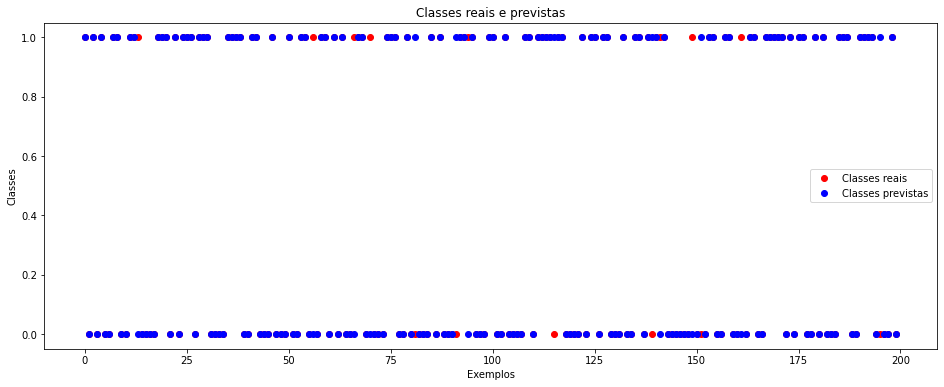

In [10]:
# Gráfico das classes reais e previstas
plt.figure(figsize=(16, 6))
plt.plot(Y_teste, 'ro', label='Classes reais')
plt.plot(classes, 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show

**SALVAR UMA RNA COMPLETA**
⇒ Para salvar uma RNA desenvolvida com o Keras usamos o método save(file_path_and_name) nesse caso a RNA é
salva em um arquivo no formato hdf5 que contém:
    - A arquitetura da RNA;
    - Os parâmetros da RNA;
    - Os parâmetros do otimizador usado para treinar a RNA;
    - O estado do otimizador para permitir continuar o treinamento exatamente de onde parou.

⇒ Tendo uma RNA salva em um arquivo do formato HDF5 podemos usar o método load_model(file_path_and_name) para
restabelecer a RNA da mesma forma que era quando foi salva.


In [11]:
# Importa biblioteca para manipular arquivos no formato HDF5
import h5py
# Salva RNA e cria um arquivo formato HDF5 de nome RNA.h5
rna.save('RNA.h5')
# Se estiver estiver usando o Colab pode salvar no diretório temp
#rna.save('/temp/RNA.h5')

⇒ Para esses métodos funcionarem é necessário que a biblioteca h5py do Python esteja instalada em seu computador.
